In [292]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
from sklearn.feature_extraction.text import CountVectorizer
import jieba # 导入关键字提取库

In [335]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def wenzi(data,z,a):
    list_2 = []
    list_3 = []
    lis = []
    
    for row,data_ in data.iterrows():
#         name = data_['接单时间']
#         list_3.append(name)
        y = data_[a]
        tr = y.find(z)
        if tr > -1 :
            list_2.append(y)
    print('关于' + '“' + z + '”' + '的订单数量是：',len(list_2))  
    lis.append(list_2)
    lis.append(list_3)
    return lis

def wenzi1(data,z,a):
    list_2 = []
    list_3 = []
    lis = []
    
    for row,data_ in data.iterrows():
        name = data_['接单时间1']
        list_3.append(name)
        y = data_[a]
        tr = y.find(z)
        if tr > -1 :
            list_2.append(y)
    print('关于' + '“' + z + '”' + '的订单数量是：',len(list_2))  
    lis.append(list_2)
    lis.append(list_3)
    return lis

def jiebe(data):    
    text_list = []
    for line in data:
        hou = ",".join(jieba.cut(line))
        strlist = hou.split(',') 
        text_list.append(strlist)
    return text_list

def clean(list_name_,stopwords_):    
    clean_line = []
    for line in list_name_:
        haha = []
        for word in line:
            if word in stopwords_:
                continue
            haha.append(word)
        haha = ','.join(haha)
        clean_line.append(haha)

    return clean_line

def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单编号'].count()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
    k = [list__,dict_,list_sum]
    return k

In [294]:
lujing = '花生活七夕.csv'
code = 'gbk'
data = improt_data(lujing,code)

In [295]:
lujing = '花生活问题七夕.csv'
code = 'gbk'
wrong = improt_data(lujing,code)

# data   wrong下单时间类型转换


In [298]:
data['下单时间'] = pd.to_datetime(data['下单时间'],format='%Y-%m-%d %H:%M:%S')
wrong['下单时间'] = pd.to_datetime(wrong['下单时间'],format='%Y-%m-%d %H:%M:%S')

In [299]:
data['下单时间_day'] = data['下单时间'].dt.day
data['下单时间_hour'] = data['下单时间'].dt.hour

In [300]:
data['下单时间'].count()

22014

In [301]:
drop_du(data,'下单时间_day')

[[26, 24, 25], {26: 294, 24: 3529, 25: 18191}, []]

In [302]:
df24 = data[data['下单时间_day'] == 24]
df25 = data[data['下单时间_day'] == 25]

In [304]:
print(df24['订单编号'].count())
df25['订单编号'].count()

3529


18191

In [305]:
df24[df24['订单状态'] == '订单取消']['订单编号'].count()

488

In [306]:
df25[df25['订单状态'] == '订单取消']['订单编号'].count()

3768

In [307]:
data = data[data['下单时间_day'] < 26]
data['订单编号'].count()

21720

# wrong用户催单  485

In [308]:
wrong['下单时间'].count()

5828

In [309]:
wrong['订单编号'].count()
wrong[wrong['商家服务问题']=='用户催单；\t']['订单编号'].count()

2671

In [310]:
lis = ['质量问题','拣货超时','商家少送错送','缺货','商家超时未接单','商家拒单','用户催单']
for i in lis:
    a = wenzi(wrong,i,'商家服务问题')

关于“质量问题”的订单数量是： 29
关于“拣货超时”的订单数量是： 1431
关于“商家少送错送”的订单数量是： 65
关于“缺货”的订单数量是： 157
关于“商家超时未接单”的订单数量是： 447
关于“商家拒单”的订单数量是： 1036
关于“用户催单”的订单数量是： 2921


In [311]:
for i in lis:
    a = wenzi(data_quxiao_wrong,i,'商家服务问题')

关于“质量问题”的订单数量是： 27
关于“拣货超时”的订单数量是： 8
关于“商家少送错送”的订单数量是： 62
关于“缺货”的订单数量是： 157
关于“商家超时未接单”的订单数量是： 451
关于“商家拒单”的订单数量是： 1038
关于“用户催单”的订单数量是： 432


In [312]:
data_quxiao_wrong['订单编号'].count()


2101

# 三种订单数量

In [313]:
data.drop_duplicates(subset='订单状态',keep='last',inplace=False)['订单状态']

21645    订单已处理
22012     订单完成
22013     订单取消
Name: 订单状态, dtype: object

In [314]:
data_quxiao = data[data['订单状态'] == '订单取消']

data_quxiao['订单编号'].count()

4256

# 合并 136 

In [315]:
data_quxiao_wrong = pd.merge(data_quxiao,wrong,on= ['订单编号'])
data_quxiao_wrong['订单编号'].count()


2101

In [316]:
wrong['订单编号'].count()

5828

In [317]:
data_quxiao_wrong[data_quxiao_wrong['商品实付销售额'] <= 10]['下单时间_x']

1009   2020-08-24 14:58:34
1485   2020-08-25 10:52:34
1488   2020-08-25 11:58:49
1493   2020-08-25 20:03:40
1736   2020-08-25 13:25:00
1738   2020-08-25 13:41:14
Name: 下单时间_x, dtype: datetime64[ns]

In [318]:
drop_du(data_quxiao_wrong,'商家服务问题')

[['拣货超时；\t',
  '质量问题导致退款；用户催单；\t',
  '质量问题导致退款；拣货超时；\t',
  '商家拒单；用户催单；\t',
  '商家少送错送；质量问题导致退款；\t',
  '缺货导致退款；用户催单；\t',
  '质量问题导致退款；\t',
  '商家少送错送；\t',
  '用户催单；\t',
  '缺货导致退款；\t',
  '商家少送错送；用户催单；\t',
  '商家超时未接单；\t',
  '商家拒单；\t'],
 {'拣货超时；\t': 4,
  '质量问题导致退款；用户催单；\t': 3,
  '质量问题导致退款；拣货超时；\t': 4,
  '商家拒单；用户催单；\t': 19,
  '商家少送错送；质量问题导致退款；\t': 2,
  '缺货导致退款；用户催单；\t': 19,
  '质量问题导致退款；\t': 18,
  '商家少送错送；\t': 33,
  '用户催单；\t': 365,
  '缺货导致退款；\t': 137,
  '商家少送错送；用户催单；\t': 26,
  '商家超时未接单；\t': 451,
  '商家拒单；\t': 1019},
 ['商家少送错送；缺货导致退款；\t']]

# quxiao  wrong  是否预定单

In [319]:

drop_du(data,'是否预订单')

[['是', '否'], {'是': 2653, '否': 19067}, []]

In [321]:
drop_du(data_quxiao,'是否预订单')

[['是', '否'], {'是': 398, '否': 3858}, []]

In [322]:
drop_du(data_quxiao_wrong,'是否预订单')

[['是', '否'], {'是': 119, '否': 1982}, []]

# 预订单的  取消  问题 单 

In [323]:
data_quxiao_wrong_yuding  = data_quxiao_wrong[data_quxiao_wrong['是否预订单'] == '是']
data_quxiao_wrong_yuding_list = list(data_quxiao_wrong_yuding['店铺名称_x'])
b = len(data_quxiao_wrong_yuding_list)

collection_b = Counter(data_quxiao_wrong_yuding_list)
data_quxiao_wrong_yuding_list
print(collection_b)

Counter({'溢清园花卉·七夕鲜花\t': 9, '幸福花店（七夕预定，表白，鲜花）\t': 6, '怡芬花店\t': 6, '花生活鲜花（花之都鲜花批发行）\t': 3, '博艺坊·七夕鲜花\t': 3, '爱尚花艺鲜花\t': 3, '应姐鲜花店（七夕情人节，告白，生日）\t': 3, '千色花艺（七夕情人节，礼物，鲜花）\t': 3, '花生活鲜花（爱荷花坊）\t': 2, '花生活鲜花（有钱花）\t': 2, '花生活鲜花（花之翼）\t': 2, '花生活鲜花（花房姑娘鲜花店）\t': 2, '花生活鲜花（卓伊鲜花青秀区店）\t': 2, '花花世界（七夕预定，表白，鲜花）\t': 2, '花意浓·七夕鲜花\t': 2, '鼎胜婚礼\t': 2, '吉祥花店（七夕预定，表白，鲜花）\t': 2, '喜＋喜花艺（七夕情人节，告白，鲜花）\t': 2, '千寻花道生活馆（七夕情人节，告白，生日）\t': 2, '花生活鲜花（小草堂花艺生活馆）\t': 1, '花生活鲜花（花之恋鲜花店）\t': 1, '花生活鲜花（俪缘摆渡人）\t': 1, '花生活鲜花（意达鲜花店）\t': 1, '花生活鲜花（华粤鲜花馆）\t': 1, '花生活鲜花（撒罗米园艺）\t': 1, '花生活鲜花（六月花坊）\t': 1, '花生活鲜花（荣浩千寻花艺）\t': 1, '花生活鲜花（天蓉鲜花店）\t': 1, '花生活鲜花（佳人婚庆店）\t': 1, '花生活鲜花（冉绘鲜花）\t': 1, '花生活鲜花（佳仪鲜花婚庆）\t': 1, '花生活鲜花（水晶之恋花坊）\t': 1, '花生活鲜花（香阁丽娜）\t': 1, '花生活鲜花（名媛花兿）\t': 1, '花生活鲜花（爱尚花艺）\t': 1, '花生活鲜花（义乌鲜花婚庆）\t': 1, '花生活鲜花（绿之源花卉园艺）\t': 1, '花生活鲜花（爱轩花艺）\t': 1, '花生活鲜花（温馨花屋鲜花店）\t': 1, '花生活鲜花（花恋社花艺）\t': 1, '花生活鲜花（玫瑰之约）\t': 1, '花生活鲜花（米莱婚礼鲜花店）\t': 1, '花生活鲜花（金鳞花坊）\t': 1, '花生活鲜花（鲜花花之语气球DIY）\t': 1, '鲜花礼品·七夕鲜花\t': 1, '左花生活馆（七夕预定，表白，鲜花）\t': 1, '芳君花

# 非预订单  取消  问题  单

In [324]:

data_quxiao_wrong_yuding_list = list(data_quxiao_wrong['店铺名称_x'])
b = len(data_quxiao_wrong_yuding_list)
collection_b = Counter(data_quxiao_wrong_yuding_list)
print(collection_b)

Counter({'花生活鲜花（七彩坊鲜花店）\t': 53, '花生活鲜花（藝雅鲜花店）\t': 44, '爱尚花艺鲜花\t': 30, '花生活鲜花（金鳞花坊）\t': 29, '花遇画（七夕节日，表白，鲜花）\t': 27, '花生活鲜花（花之恋花卉）\t': 26, '溢清园花卉·七夕鲜花\t': 24, '花生活鲜花（花瓣雨花坊）\t': 23, '群磊花艺\t': 22, '花生活鲜花（花田故事）\t': 20, '怡芬花店\t': 19, '鲜花主题创意坊（七夕情人节，礼物，鲜花）\t': 19, '花生活鲜花（伊馨花坊）\t': 17, '花生活鲜花（花先生鲜花店）\t': 17, '花生活鲜花（米莱婚礼鲜花店）\t': 17, '朝阳园艺\t': 17, '幸福花店（七夕预定，表白，鲜花）\t': 16, '红苑鲜花庆典（七夕预定，表白，鲜花）\t': 16, '花生活鲜花（萍萍花店）\t': 15, '花生活鲜花（花语人生）\t': 14, '吉祥花店（七夕预定，表白，鲜花）\t': 14, '百合缘花艺·七夕鲜花\t': 13, '花生活鲜花（祥和鲜花）\t': 12, '应姐鲜花店（七夕情人节，告白，生日）\t': 12, '蒂留香花艺\t': 12, '花唯媒\t': 11, '花生活鲜花（卓伊鲜花青秀区店）\t': 11, '博艺坊·七夕鲜花\t': 11, '花意浓·七夕鲜花\t': 11, '花生活鲜花（祥瑞花艺坊）\t': 10, '花生活鲜花（栋梁花卉）\t': 10, '花生活鲜花（花草堂鲜花店）\t': 10, '花生活鲜花（夜来香鲜花）\t': 10, '华鹏花卉鲜花（道城路店）\t': 10, '花花小姐（七夕情人节，表白，鲜花）\t': 10, '兰亭花屿\t': 10, '鼎胜婚礼\t': 10, '田歆花艺馆·七夕鲜花\t': 10, '牵手花艺（七夕预定，表白，鲜花）\t': 10, '娄阑花艺\t': 10, '花生活鲜花（雪莲花艺）\t': 9, '花生活鲜花（有钱花）\t': 9, '呆子花艺（七夕预定，告白，生日）\t': 9, '花生活鲜花（臻挚花艺馆）\t': 9, '不忘初心花艺·七夕鲜花\t': 9, '花坞鲜花绿植店\t': 9, '花堡·七夕鲜花\t': 9, '千色花艺（七夕情人节，礼物，鲜花

In [277]:
data_quxiao_wrong = list(data_quxiao_wrong['店铺名称_x'])
b = len(data_quxiao_wrong)
collection_b = Counter(data_quxiao_wrong)
print(collection_b)

Counter({'花生活鲜花（七彩坊鲜花店）\t': 53, '花生活鲜花（藝雅鲜花店）\t': 44, '爱尚花艺鲜花\t': 30, '花生活鲜花（金鳞花坊）\t': 29, '花遇画（七夕节日，表白，鲜花）\t': 27, '花生活鲜花（花之恋花卉）\t': 26, '溢清园花卉·七夕鲜花\t': 24, '花生活鲜花（花瓣雨花坊）\t': 23, '群磊花艺\t': 22, '花生活鲜花（花田故事）\t': 20, '怡芬花店\t': 19, '鲜花主题创意坊（七夕情人节，礼物，鲜花）\t': 19, '花生活鲜花（伊馨花坊）\t': 17, '花生活鲜花（花先生鲜花店）\t': 17, '花生活鲜花（米莱婚礼鲜花店）\t': 17, '朝阳园艺\t': 17, '幸福花店（七夕预定，表白，鲜花）\t': 16, '红苑鲜花庆典（七夕预定，表白，鲜花）\t': 16, '花生活鲜花（萍萍花店）\t': 15, '花生活鲜花（花语人生）\t': 14, '吉祥花店（七夕预定，表白，鲜花）\t': 14, '百合缘花艺·七夕鲜花\t': 13, '花生活鲜花（祥和鲜花）\t': 12, '应姐鲜花店（七夕情人节，告白，生日）\t': 12, '蒂留香花艺\t': 12, '花唯媒\t': 11, '花生活鲜花（卓伊鲜花青秀区店）\t': 11, '博艺坊·七夕鲜花\t': 11, '花意浓·七夕鲜花\t': 11, '花生活鲜花（祥瑞花艺坊）\t': 10, '花生活鲜花（栋梁花卉）\t': 10, '花生活鲜花（花草堂鲜花店）\t': 10, '花生活鲜花（夜来香鲜花）\t': 10, '华鹏花卉鲜花（道城路店）\t': 10, '花花小姐（七夕情人节，表白，鲜花）\t': 10, '兰亭花屿\t': 10, '鼎胜婚礼\t': 10, '田歆花艺馆·七夕鲜花\t': 10, '牵手花艺（七夕预定，表白，鲜花）\t': 10, '娄阑花艺\t': 10, '花生活鲜花（雪莲花艺）\t': 9, '花生活鲜花（有钱花）\t': 9, '呆子花艺（七夕预定，告白，生日）\t': 9, '花生活鲜花（臻挚花艺馆）\t': 9, '不忘初心花艺·七夕鲜花\t': 9, '花坞鲜花绿植店\t': 9, '花堡·七夕鲜花\t': 9, '千色花艺（七夕情人节，礼物，鲜花

In [343]:
data_quxiao['接单时间1'] = data_quxiao['接单时长'].str.split('秒',expand=True)[0]
data['接单时间1'] = data_quxiao['接单时长'].str.split('秒',expand=True)[0]
data_quxiao_wrong['接单时间1'] = data_quxiao_wrong['接单时长'].str.split('秒',expand=True)[0]

<ipython-input-343-09551acd18fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_quxiao['接单时间1'] = data_quxiao['接单时长'].str.split('秒',expand=True)[0]


In [344]:
# data_quxiao.to_csv('取消订单.csv')
# data.to_csv('data.csv')

In [345]:
a = wenzi1(data,'订单完成','订单状态')
from numpy import *
list_time = []
for i in a[1]:
    a = type(i)
    a = str(a)
    if a == "<class 'float'>":
        i = 0
#     print(i)
    j = int(i)
    list_time.append(j)
print('data平均接单时间%f秒' %mean(list_time))

关于“订单完成”的订单数量是： 17319
data平均接单时间5.528223秒


In [346]:
a = wenzi1(data_quxiao,'订单取消','订单状态')
from numpy import *
list_time = []
for i in a[1]:
#     print(i)
    j = int(i)
    list_time.append(j)
print('取消平均接单时间%f秒' %mean(list_time))

关于“订单取消”的订单数量是： 4256
取消平均接单时间28.212641秒


In [347]:
a = wenzi1(data_quxiao_wrong,'订单取消','订单状态')
from numpy import *
list_time = []
for i in a[1]:
#     print(i)
    j = int(i)
    list_time.append(j)
print('取消平均接单时间%f秒' %mean(list_time))

关于“订单取消”的订单数量是： 2101
取消平均接单时间26.221799秒


In [349]:
data_quxiao['接单时间1'] = data_quxiao['接单时间1'].astype(int)

data.fillna(0,inplace=True)
data['接单时间1'] = data['接单时间1'].astype(int)

<ipython-input-349-df932f01def7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_quxiao['接单时间1'] = data_quxiao['接单时间1'].astype(int)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 25509 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 21333 missing from cur

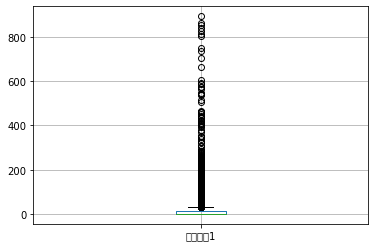

In [350]:
data_quxiao.boxplot('接单时间1')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 25509 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 21333 missing from cur

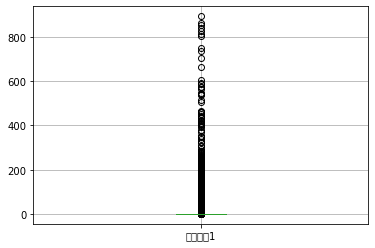

In [352]:
data.boxplot('接单时间1')

In [353]:
Q1 = np.percentile(data_quxiao['接单时间1'], 25)
Q3 = np.percentile(data_quxiao['接单时间1'], 75)
Q2 = np.percentile(data_quxiao['接单时间1'], 50)
IQ = Q3 - Q1

In [354]:
Q4 = Q3 + 1.5*IQ
print(Q4)

32.5


In [355]:
print(Q3)

13.0


In [356]:
print(Q2)

0.0


In [358]:
data_quxiao['接单时间1'].mean()

28.21264097744361

# 查看三种店铺情况

In [359]:
data

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,下单时间_day,下单时间_hour,接单时间1
0,\t20200824-20200826,6429891269807160,2020-08-24 10:18:28,0秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,配送中,是,269.0,121.0,0.0,187.0,约惠七夕11枝\t,『心心相印』11枝红玫瑰搭配满天星礼盒七夕情人节礼物鲜花店,0.0,qx20200825001\t,1,269.0,121.0,148.0,148.0,0.0,否,0,0.0,0.0,0.0,是,满39.0元赠精美贺卡（可写祝福语）*1/购买『情人知己』11枝红玫瑰搭配满天星礼盒七夕情人...,否,未回复,0,0.00分,0.0,2020-08-25 14:19:09\t,0,24,10,0
1,\t20200824-20200826,6429893736842411,2020-08-24 17:42:36,1秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,配送中,否,298.0,126.0,0.0,211.0,约惠七夕11枝\t,『天作之合』11枝香槟玫瑰搭配尤加利礼盒七夕情人节礼物鲜花店,0.0,mldnzk002\t,1,298.0,126.0,172.0,172.0,0.0,否,0,0.0,0.0,0.0,是,满39.0元赠精美贺卡（可写祝福语）*1/购买『天作之合』11枝香槟玫瑰搭配尤加利礼盒七夕情...,否,未回复,0,0.00分,0.0,2020-08-24 23:47:23\t,0,24,17,0
2,\t20200824-20200826,6429893966510833,2020-08-24 18:54:56,0秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,用户提交订单,否,288.0,185.0,0.0,142.0,生日快乐づ———\t,『至死不渝』满天星鲜花花束 送女友送闺蜜送情人推荐,0.0,ZSBY01\t,1,288.0,185.0,103.0,103.0,0.0,否,0,0.0,0.0,0.0,是,满200.0元减100.0元/满39.0元赠精美贺卡（可写祝福语）*1/门店新客立减3.0元...,否,未回复,0,0.00分,0.0,2020-08-25 02:32:24\t,0,24,18,0
3,\t20200824-20200826,6429891601381307,2020-08-24 20:04:04,0秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,用户提交订单,是,299.0,186.0,5.0,147.0,蓝色爱恋づ———\t,『Blue A3款』19枝蓝色玫瑰鲜花+配草+2只小熊 礼盒,0.0,SAD1231ZS\t,1,299.0,186.0,113.0,108.0,5.0,否,0,0.0,0.0,0.0,是,满200.0元减100.0元/满39.0元赠精美贺卡（可写祝福语）*1/用户使用了会员红包减...,否,未回复,0,0.00分,0.0,2020-08-25 16:27:43\t,0,24,20,0
4,\t20200824-20200826,6429893049752078,2020-08-24 11:20:04,0秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,用户提交订单,是,245.0,142.0,0.0,142.0,店长推荐づ——\t,『亭亭玉立』11枝粉玫瑰配尤加利韩式花束情人节七夕礼物鲜花,0.0,1336876\t,1,245.0,142.0,103.0,103.0,0.0,否,0,0.0,0.0,0.0,是,满200.0元减100.0元/满39.0元赠精美贺卡（可写祝福语）*1/门店新客立减3.0元...,否,未回复,0,0.00分,0.0,2020-08-25 13:25:12\t,0,24,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22009,\t20200824-20200826,98102271677285159,2020-08-25 11:13:57,327秒,爱之漫\t,9810227,张家口\t,在线支付,订单完成,配送中,否,598.0,265.0,0.0,372.0,约惠七夕33枝\t,『一生一世』520摆式红玫瑰搭配相思梅礼盒七夕情人节礼物鲜花,0.0,XH012\t,1,598.0,265.0,333.0,333.0,0.0,否,0,0.0,0.0,0.0,是,满50.0元赠精美贺卡*1/购买『一生一世』520摆式红玫瑰搭配相思梅礼盒七夕情人节礼物鲜花...,否,未回复,0,0.00分,0.0,2020-08-25 15:53:57\t,0,25,11,0
22010,\t20200824-20200826,98102273382704585,2020-08-25 13:44:51,47秒,爱之漫\t,9810227,张家口\t,在线支付,订单完成,配送中,否,245.0,156.0,0.0,128.0,店长推荐づ——\t,『亭亭玉立』11枝粉玫瑰配尤加利韩式花束情人节七夕礼物鲜花,0.0,TH001\t,1,245.0,156.0,89.0,89.0,0.0,否,0,0.0,0.0,0.0,是,满50.0元赠精美贺卡*1/购买『亭亭玉立』11枝粉玫瑰配尤加利韩式花束情人节七夕礼物鲜花原...,否,未回复,0,0.00分,0.0,2020-08-25 21:10:50\t,0,25,13,0
22011,\t20200824-20200826,98102272141837702,2020-08-25 13:53:39,38秒,爱之漫\t,9810227,张家口\t,在线支付,订单完成,配送中,否,888.0,386.0,0.0,541.0,约惠七夕52枝\t,『艳丽夺目』52枝红玫瑰精致韩式花束七夕情人节礼物鲜花店,0.0,qx20200825055\t,1,888.0,386.0,502.0,502.0,0.0,否,0,0.0,0.0,0.0,是,满50.0元赠精美贺卡*1/购买『艳丽夺目』52枝红玫瑰精致韩式花束七夕情人节礼物鲜花店原价...,否,未回复,0,0.00分,0.0,2020-08-25 21:08:14\t,0,25,13,0
22012,\t20200824-20200826,98102270358768070,2020-08-25 15:38:52,25秒,爱之漫\t,9810227,张家口\t,在线支付,订单完成,配送中,否,299.0,156.0,0.0,182.0,约惠七夕11枝\t,『花信年华』11红玫瑰花七夕情人节礼物鲜花店,0.0,TH004\t,1,299.0,156.0,143.0,143.0,0.0,否,0,0.0,0.0,0.0,是,满50.0元赠精美贺卡*1/购买『花信年华』11红玫瑰花七夕情人节礼物鲜花店原价299.0元...,否,未回复,0,0.00分,0.0,2020-08-25 22:24:44\t,0,25,15,0


In [360]:
a = drop_du(data,'店铺名称')
temp = sorted(a[1].items(), key=lambda x: x[1], reverse=True)
temp

[('花生活鲜花（遇见花艺馆）\t', 284),
 ('千百卉鲜花店（七夕预定，表白，鲜花）\t', 205),
 ('花生活鲜花（花之恋鲜花店）\t', 197),
 ('花生活鲜花（家美园艺）\t', 196),
 ('花生活鲜花（花海）\t', 179),
 ('卡斯曼鲜花店(衡阳先峰路店）\t', 174),
 ('花生活鲜花（庆祝花卉）\t', 173),
 ('花生活鲜花（龙兴花艺）\t', 161),
 ('花生活鲜花（萍萍花店）\t', 158),
 ('郁涧鲜花坊（七夕情人节，礼物，鲜花）\t', 151),
 ('花生活鲜花（意达鲜花店）\t', 143),
 ('花生活鲜花（四季花屋）\t', 138),
 ('朝花夕拾花艺（七夕情人节，告白，鲜花）\t', 125),
 ('花生活鲜花（极乐莲华鲜花）\t', 121),
 ('花生活鲜花（栋梁花卉）\t', 115),
 ('花生活鲜花（铭相花缘）\t', 112),
 ('花生活鲜花（窑辉鲜花礼仪）\t', 108),
 ('花语轩（七夕情人节，表白，鲜花）\t', 103),
 ('友缘鲜花（七夕节日，表白，鲜花）\t', 101),
 ('花无缺鲜花(花生活鲜花林州店)\t', 100),
 ('花生活鲜花（水滴鲜花花艺）\t', 98),
 ('花生活鲜花（花界花店）\t', 98),
 ('创意鲜花（七夕情人节，礼物，鲜花）\t', 93),
 ('花生活鲜花（花恋社花艺）\t', 91),
 ('不忘初心花艺·七夕鲜花\t', 91),
 ('花生活鲜花（鲜花绿植）\t', 90),
 ('花生活鲜花（玫瑰花坊）\t', 89),
 ('水晶花房（七夕预定，表白，鲜花）\t', 88),
 ('花遇画（七夕节日，表白，鲜花）\t', 88),
 ('花生活鲜花（遇见花艺鲜花店）\t', 87),
 ('花瓣雨·七夕鲜花\t', 85),
 ('花生活鲜花（香阁丽娜）\t', 82),
 ('花栈鲜花店（七夕预定鲜花、表白、生日）\t', 82),
 ('花生活鲜花（心怡花店）\t', 81),
 ('爱花居晴儿鲜花（七夕情人节，告白，生日）\t', 81),
 ('花开一束·七夕鲜花\t', 80),
 ('花生活鲜花（温馨花店）\t', 79),
 ('安宁胡子花卉店(花生活

In [361]:
b = drop_du(data_quxiao,'店铺名称')
temp = sorted(b[1].items(), key=lambda x: x[1], reverse=True)
temp

[('花生活鲜花（七彩坊鲜花店）\t', 56),
 ('花生活鲜花（藝雅鲜花店）\t', 48),
 ('花遇画（七夕节日，表白，鲜花）\t', 44),
 ('爱尚花艺鲜花\t', 40),
 ('花生活鲜花（金鳞花坊）\t', 39),
 ('花生活鲜花（萍萍花店）\t', 34),
 ('溢清园花卉·七夕鲜花\t', 33),
 ('创意鲜花（七夕情人节，礼物，鲜花）\t', 29),
 ('花生活鲜花（伊馨花坊）\t', 28),
 ('不忘初心花艺·七夕鲜花\t', 28),
 ('花生活鲜花（花之恋花卉）\t', 27),
 ('群磊花艺\t', 26),
 ('花生活鲜花（花瓣雨花坊）\t', 25),
 ('花生活鲜花（花田故事）\t', 25),
 ('鲜花主题创意坊（七夕情人节，礼物，鲜花）\t', 25),
 ('怡芬花店\t', 24),
 ('吉祥花店（七夕预定，表白，鲜花）\t', 24),
 ('花生活鲜花（花伴鲜花）\t', 21),
 ('千百卉鲜花店（七夕预定，表白，鲜花）\t', 21),
 ('百合缘花艺·七夕鲜花\t', 21),
 ('花生活鲜花（祥和鲜花）\t', 20),
 ('花生活鲜花（家美园艺）\t', 20),
 ('幸福花店（七夕预定，表白，鲜花）\t', 20),
 ('花堡·七夕鲜花\t', 20),
 ('朝阳园艺\t', 19),
 ('花生活鲜花（花语人生）\t', 18),
 ('郁涧鲜花坊（七夕情人节，礼物，鲜花）\t', 18),
 ('花生活鲜花（庆祝花卉）\t', 18),
 ('花生活鲜花（花之翼）\t', 18),
 ('花生活鲜花（花先生鲜花店）\t', 18),
 ('花生活鲜花（花草堂鲜花店）\t', 18),
 ('花生活鲜花（米莱婚礼鲜花店）\t', 17),
 ('应姐鲜花店（七夕情人节，告白，生日）\t', 17),
 ('真爱花艺（七夕节日，表白，鲜花）\t', 17),
 ('红苑鲜花庆典（七夕预定，表白，鲜花）\t', 17),
 ('有间花店（七夕情人节，告白，生日）\t', 17),
 ('MissYou花艺工作室\t', 17),
 ('花生活鲜花（栋梁花卉）\t', 16),
 ('花生活鲜花（夜来香鲜花）\t', 16),
 ('花生活鲜花（花恋社花艺）

In [362]:
c = drop_du(data_quxiao_wrong,'店铺名称_x')
temp = sorted(c[1].items(), key=lambda x: x[1], reverse=True)
temp

[('花生活鲜花（七彩坊鲜花店）\t', 53),
 ('花生活鲜花（藝雅鲜花店）\t', 44),
 ('爱尚花艺鲜花\t', 30),
 ('花生活鲜花（金鳞花坊）\t', 29),
 ('花遇画（七夕节日，表白，鲜花）\t', 27),
 ('花生活鲜花（花之恋花卉）\t', 26),
 ('溢清园花卉·七夕鲜花\t', 24),
 ('花生活鲜花（花瓣雨花坊）\t', 23),
 ('群磊花艺\t', 22),
 ('花生活鲜花（花田故事）\t', 20),
 ('怡芬花店\t', 19),
 ('鲜花主题创意坊（七夕情人节，礼物，鲜花）\t', 19),
 ('花生活鲜花（伊馨花坊）\t', 17),
 ('花生活鲜花（花先生鲜花店）\t', 17),
 ('花生活鲜花（米莱婚礼鲜花店）\t', 17),
 ('朝阳园艺\t', 17),
 ('幸福花店（七夕预定，表白，鲜花）\t', 16),
 ('红苑鲜花庆典（七夕预定，表白，鲜花）\t', 16),
 ('花生活鲜花（萍萍花店）\t', 15),
 ('花生活鲜花（花语人生）\t', 14),
 ('吉祥花店（七夕预定，表白，鲜花）\t', 14),
 ('百合缘花艺·七夕鲜花\t', 13),
 ('花生活鲜花（祥和鲜花）\t', 12),
 ('应姐鲜花店（七夕情人节，告白，生日）\t', 12),
 ('蒂留香花艺\t', 12),
 ('花生活鲜花（卓伊鲜花青秀区店）\t', 11),
 ('博艺坊·七夕鲜花\t', 11),
 ('花意浓·七夕鲜花\t', 11),
 ('花唯媒\t', 11),
 ('花生活鲜花（祥瑞花艺坊）\t', 10),
 ('花生活鲜花（栋梁花卉）\t', 10),
 ('花生活鲜花（花草堂鲜花店）\t', 10),
 ('花生活鲜花（夜来香鲜花）\t', 10),
 ('华鹏花卉鲜花（道城路店）\t', 10),
 ('花花小姐（七夕情人节，表白，鲜花）\t', 10),
 ('兰亭花屿\t', 10),
 ('鼎胜婚礼\t', 10),
 ('田歆花艺馆·七夕鲜花\t', 10),
 ('牵手花艺（七夕预定，表白，鲜花）\t', 10),
 ('娄阑花艺\t', 10),
 ('花生活鲜花（雪莲花艺）\t', 9),
 ('花生活鲜花（有钱花）\t', 9)

# 七夕订单上涨幅度

In [366]:
df24

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,下单时间_day,下单时间_hour
0,\t20200824-20200826,6429891269807160,2020-08-24 10:18:28,0秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,配送中,是,269.0,121.0,0.0,187.0,约惠七夕11枝\t,『心心相印』11枝红玫瑰搭配满天星礼盒七夕情人节礼物鲜花店,NaN,qx20200825001\t,1,269.0,121.0,148.0,148.0,0.0,否,0,0.0,0.0,0.0,是,满39.0元赠精美贺卡（可写祝福语）*1/购买『情人知己』11枝红玫瑰搭配满天星礼盒七夕情人...,否,未回复,NaN,0.00分,0.0,2020-08-25 14:19:09\t,NaN,24,10
1,\t20200824-20200826,6429893736842411,2020-08-24 17:42:36,1秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,配送中,否,298.0,126.0,0.0,211.0,约惠七夕11枝\t,『天作之合』11枝香槟玫瑰搭配尤加利礼盒七夕情人节礼物鲜花店,NaN,mldnzk002\t,1,298.0,126.0,172.0,172.0,0.0,否,0,0.0,0.0,0.0,是,满39.0元赠精美贺卡（可写祝福语）*1/购买『天作之合』11枝香槟玫瑰搭配尤加利礼盒七夕情...,否,未回复,NaN,0.00分,0.0,2020-08-24 23:47:23\t,NaN,24,17
2,\t20200824-20200826,6429893966510833,2020-08-24 18:54:56,0秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,用户提交订单,否,288.0,185.0,0.0,142.0,生日快乐づ———\t,『至死不渝』满天星鲜花花束 送女友送闺蜜送情人推荐,NaN,ZSBY01\t,1,288.0,185.0,103.0,103.0,0.0,否,0,0.0,0.0,0.0,是,满200.0元减100.0元/满39.0元赠精美贺卡（可写祝福语）*1/门店新客立减3.0元...,否,未回复,NaN,0.00分,0.0,2020-08-25 02:32:24\t,NaN,24,18
3,\t20200824-20200826,6429891601381307,2020-08-24 20:04:04,0秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,用户提交订单,是,299.0,186.0,5.0,147.0,蓝色爱恋づ———\t,『Blue A3款』19枝蓝色玫瑰鲜花+配草+2只小熊 礼盒,NaN,SAD1231ZS\t,1,299.0,186.0,113.0,108.0,5.0,否,0,0.0,0.0,0.0,是,满200.0元减100.0元/满39.0元赠精美贺卡（可写祝福语）*1/用户使用了会员红包减...,否,未回复,NaN,0.00分,0.0,2020-08-25 16:27:43\t,NaN,24,20
4,\t20200824-20200826,6429893049752078,2020-08-24 11:20:04,0秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,用户提交订单,是,245.0,142.0,0.0,142.0,店长推荐づ——\t,『亭亭玉立』11枝粉玫瑰配尤加利韩式花束情人节七夕礼物鲜花,NaN,1336876\t,1,245.0,142.0,103.0,103.0,0.0,否,0,0.0,0.0,0.0,是,满200.0元减100.0元/满39.0元赠精美贺卡（可写祝福语）*1/门店新客立减3.0元...,否,未回复,NaN,0.00分,0.0,2020-08-25 13:25:12\t,NaN,24,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21959,\t20200824-20200826,98037290402766777,2020-08-24 22:15:31,0秒,满天星花艺\t,9803729,深圳\t,在线支付,订单完成,用户提交订单,是,269.0,136.0,0.0,172.0,约惠七夕11枝\t,『情人知己』11枝红玫瑰搭配满天星礼盒七夕情人节礼物鲜花店,NaN,qx20200825001\t,1,269.0,136.0,133.0,133.0,0.0,否,0,0.0,0.0,0.0,是,满50.0元赠精美贺卡*1/购买『情人知己』11枝红玫瑰搭配满天星礼盒七夕情人节礼物鲜花店原...,否,未回复,NaN,0.00分,0.0,2020-08-25 14:30:03\t,NaN,24,22
21960,\t20200824-20200826,98037290597893318,2020-08-24 22:53:27,28秒,满天星花艺\t,9803729,深圳\t,在线支付,订单完成,配送中,否,598.0,365.0,0.0,272.0,约惠七夕33枝\t,『一心一意』IOU红玫瑰高端礼盒七夕情人节礼物鲜花店,NaN,XH013\t,1,598.0,365.0,233.0,233.0,0.0,否,0,0.0,0.0,0.0,是,满50.0元赠精美贺卡*1/购买『一心一意』IOU红玫瑰高端礼盒七夕情人节礼物鲜花店原价59...,否,未回复,NaN,0.00分,0.0,2020-08-25 03:40:20\t,NaN,24,22
21961,\t20200824-20200826,98037293102964850,2020-08-24 23:10:08,34秒,满天星花艺\t,9803729,深圳\t,在线支付,订单完成,配送中,否,258.0,186.0,0.0,111.0,约惠七夕19枝\t,『爱情爱情』19枝红玫瑰搭配两朵百合鲜花礼盒 生日礼物爱人,NaN,ZK003\t,1,258.0,186.0,72.0,72.0,0.0,否,0,0.0,0.0,0.0,是,满50.0元赠精美贺卡*1/购买『爱情爱情』19枝红玫瑰搭配两朵百合鲜花七夕情人节礼盒原价2...,否,未回复,NaN,0.00分,0.0,2020-08-25 03:50:06\t,NaN,24,23
21962,\t20200824-20200826,98037292024161140,2020-08-24 20:52:20,15秒,满天星花艺\t,9803729,深圳\t,在线支付,订单完成,配送中,否,348.0,136.0,0.0,251.0,活动专区づ———\t,『情有独钟』11枝红玫瑰鲜花礼盒七夕情人节送女友表白礼物,NaN,ASD12354\t,1,348.0,136.0,212.0,212.0,0.0,否,0,0.0,0.0,0.0,是,满50.0元赠精美贺卡*1/购买『情有独钟』11枝红玫瑰鲜花礼盒七夕情人节送女友表白礼物原价...,否,未回复,NaN,0.00分,0.0,2020-08-25 02:05:38\t,NaN,24,20


In [367]:
a = drop_du(df24,'下单时间_hour')
collection_d = Counter(a[1])
print(collection_d)


Counter({23: 386, 22: 353, 20: 305, 21: 296, 19: 272, 18: 246, 17: 224, 16: 201, 15: 183, 12: 173, 14: 172, 13: 166, 11: 166, 10: 137, 9: 110, 8: 64, 0: 23, 7: 19, 6: 10, 1: 9, 2: 6, 4: 5, 5: 3})


In [369]:
b = drop_du(df25,'下单时间_hour')
collection_e = Counter(b[1])
print(collection_e)

Counter({9: 2082, 10: 1917, 11: 1666, 12: 1504, 8: 1414, 13: 1314, 14: 1260, 15: 1210, 16: 968, 17: 733, 18: 679, 7: 637, 19: 597, 20: 422, 0: 360, 21: 273, 6: 254, 1: 228, 22: 222, 23: 131, 2: 105, 5: 79, 3: 73, 4: 63})


In [370]:
df24 = pd.DataFrame(pd.Series(a[1]), columns=['count'])
df24 = df24.reset_index().rename(columns={'index':'time'})
df24.sort_values("time",inplace=True)
df24['time'] = df24['time'].apply(str)


In [371]:
df25 = pd.DataFrame(pd.Series(b[1]), columns=['count'])
df25 = df25.reset_index().rename(columns={'index':'time'})
df25.sort_values("time",inplace=True)
df25['time'] = df25['time'].apply(str)


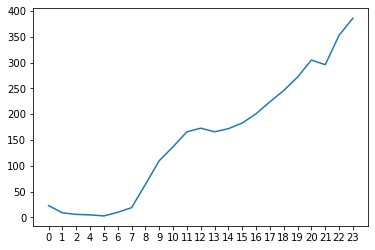

In [372]:
import matplotlib.pyplot as plt
plt.plot(df24['time'],df24['count'])


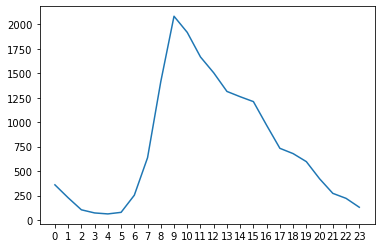

In [373]:
plt.plot(df25['time'],df25['count'])